In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv(r"Data\\india_data\\nifty50_data.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.sort_values("Date", ascending=True)
df = df.reset_index()
df.head(5)

,index,Index Name,Date,PE,PB,Div Yield,Close,Earnings
0,6513,NIFTY 50,1999-01-01,11.62,2.07,1.83,890.80,76.66
1,6512,NIFTY 50,1999-01-04,11.72,2.08,1.81,897.80,76.60
2,6511,NIFTY 50,1999-01-05,11.84,2.11,1.79,907.20,76.62
3,6510,NIFTY 50,1999-01-06,12.11,2.16,1.75,928.25,76.65
4,6509,NIFTY 50,1999-01-07,12.46,2.22,1.71,954.70,76.62


In [33]:
median_pe = np.median(df["PE"])

In [34]:
median_pe

np.float64(20.82)

In [35]:
pe_deviations = np.array([])
for i in df["PE"]:
    pe_deviations = np.append(pe_deviations, (i-median_pe))

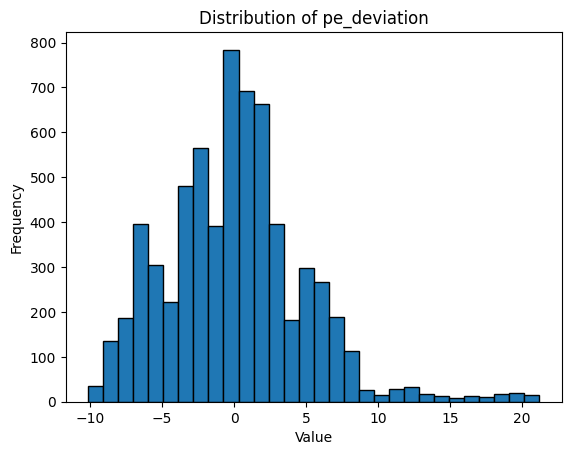

In [36]:
plt.hist(pe_deviations, bins=30, edgecolor='black')
plt.title('Distribution of pe_deviation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [37]:
df_filtered = df[df["Date"].dt.year >= 2005]

C:\Users\sanja\AppData\Local\Temp\ipykernel_15224\4180191462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cumulative_Median_PE"] = df_filtered["PE"].expanding(min_periods=1).median()
C:\Users\sanja\AppData\Local\Temp\ipykernel_15224\4180191462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cumulative_Mean_PE"] = df_filtered["PE"].expanding(min_periods=1).mean()
C:\Users\sanja\AppData\Local\Temp\ipykernel_15224\4180191462.py:3: SettingWithCopyWarning: 
A value is trying 

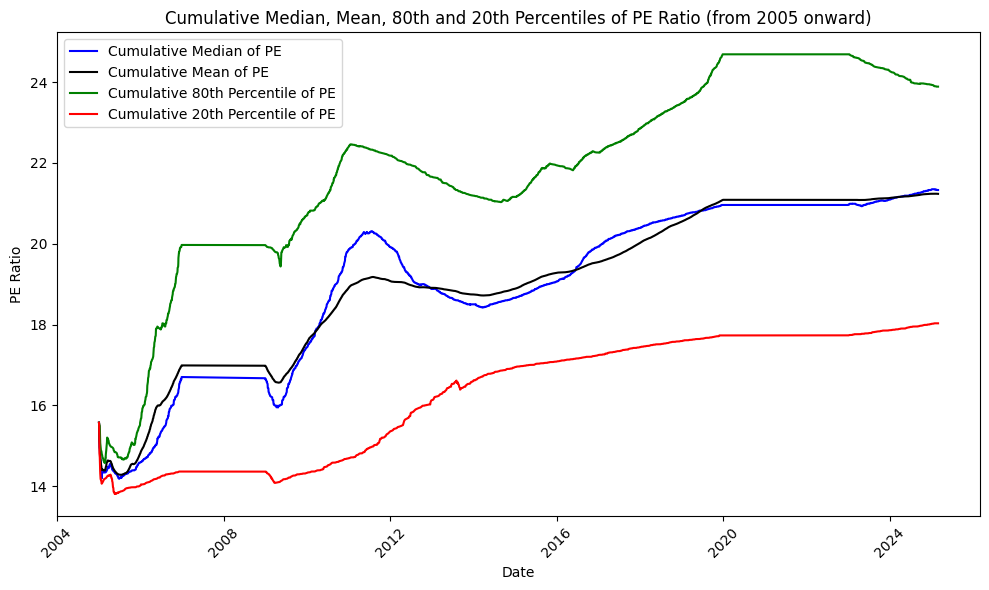

In [45]:
df_filtered["Cumulative_Median_PE"] = df_filtered["PE"].expanding(min_periods=1).median()
df_filtered["Cumulative_Mean_PE"] = df_filtered["PE"].expanding(min_periods=1).mean()
df_filtered["Cumulative_80th_Percentile_PE"] = df_filtered["PE"].expanding(min_periods=1).quantile(0.8)
df_filtered["Cumulative_20th_Percentile_PE"] = df_filtered["PE"].expanding(min_periods=1).quantile(0.2)

plt.figure(figsize=(10, 6))

plt.plot(df_filtered["Date"], df_filtered["Cumulative_Median_PE"], label="Cumulative Median of PE", color='blue')
plt.plot(df_filtered["Date"], df_filtered["Cumulative_Mean_PE"], label="Cumulative Mean of PE", color='black')
plt.plot(df_filtered["Date"], df_filtered["Cumulative_80th_Percentile_PE"], label="Cumulative 80th Percentile of PE", color='green')
plt.plot(df_filtered["Date"], df_filtered["Cumulative_20th_Percentile_PE"], label="Cumulative 20th Percentile of PE", color='red')

plt.title("Cumulative Median, Mean, 80th and 20th Percentiles of PE Ratio (from 2005 onward)")
plt.xlabel("Date")
plt.ylabel("PE Ratio")
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend()
plt.show()

In [39]:
df_filtered.count

<bound method DataFrame.count of       index Index Name       Date     PE    PB  Div Yield     Close  Earnings  \
1511   5002   NIFTY 50 2005-01-03  15.57  3.67       1.89   2115.00    135.84   
1512   5001   NIFTY 50 2005-01-04  15.49  3.65       1.90   2103.75    135.81   
1513   5000   NIFTY 50 2005-01-05  14.96  3.52       1.97   2032.20    135.84   
1514   4999   NIFTY 50 2005-01-06  14.71  3.47       2.00   1998.35    135.85   
1515   4998   NIFTY 50 2005-01-07  14.84  3.49       1.98   2015.50    135.82   
...     ...        ...        ...    ...   ...        ...       ...       ...   
6509      4   NIFTY 50 2025-02-21  20.26  3.39       1.41  22795.90   1125.17   
6510      3   NIFTY 50 2025-02-24  20.05  3.36       1.42  22553.35   1124.86   
6511      2   NIFTY 50 2025-02-25  20.04  3.36       1.42  22547.55   1125.13   
6512      1   NIFTY 50 2025-02-27  20.04  3.36       1.42  22545.05   1125.00   
6513      0   NIFTY 50 2025-02-28  19.67  3.29       1.45  22124.70   1124.7

C:\Users\sanja\AppData\Local\Temp\ipykernel_15224\906940653.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cumulative_Median_PE"] = cumulative_median_pe
C:\Users\sanja\AppData\Local\Temp\ipykernel_15224\906940653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cumulative_80th_Percentile_PE"] = cumulative_80th_percentile_pe
C:\Users\sanja\AppData\Local\Temp\ipykernel_15224\906940653.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

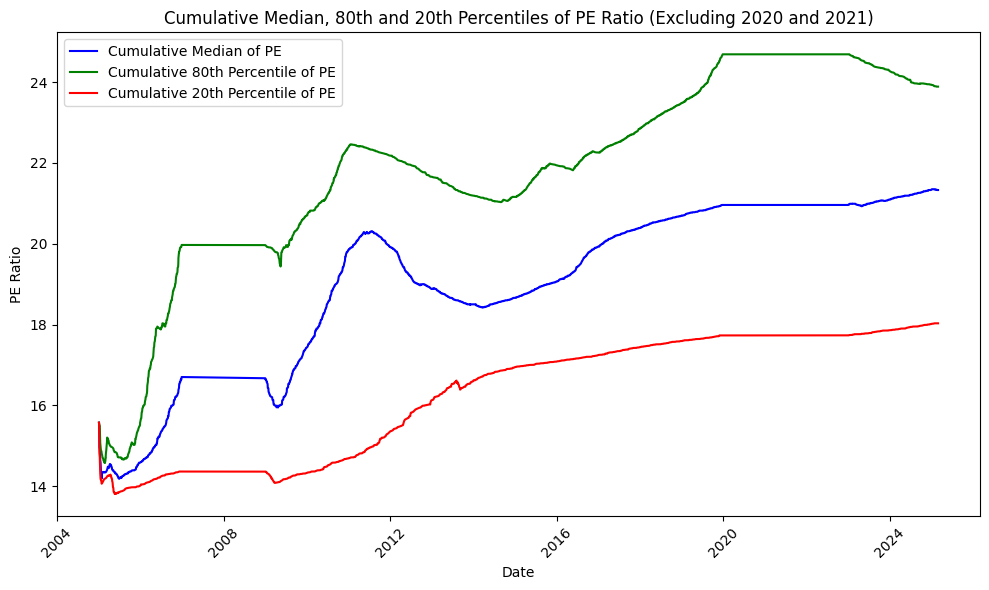

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered is already loaded with the necessary data
# For this example, we will assume the Date column is in datetime format
# If it's not already, you can convert it like this:
# df_filtered["Date"] = pd.to_datetime(df_filtered["Date"])

# Filter out rows where the year is 2020 or 2021
df_filtered = df_filtered[~df_filtered["Date"].dt.year.isin([2007,2008,2020, 2021, 2022])]

# Initialize lists to store cumulative values
cumulative_median_pe = []
cumulative_80th_percentile_pe = []
cumulative_20th_percentile_pe = []

# Loop through the DataFrame and calculate cumulative statistics
for i in range(len(df_filtered)):
    # Get the current subset of data up to the current row
    current_data = df_filtered["PE"][:i+1]
    
    # Calculate the median, 80th percentile, and 20th percentile for the current subset
    cumulative_median_pe.append(np.median(current_data))
    cumulative_80th_percentile_pe.append(np.percentile(current_data, 80))
    cumulative_20th_percentile_pe.append(np.percentile(current_data, 20))

# Add the cumulative values as new columns to the DataFrame
df_filtered["Cumulative_Median_PE"] = cumulative_median_pe
df_filtered["Cumulative_80th_Percentile_PE"] = cumulative_80th_percentile_pe
df_filtered["Cumulative_20th_Percentile_PE"] = cumulative_20th_percentile_pe

# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(df_filtered["Date"], df_filtered["Cumulative_Median_PE"], label="Cumulative Median of PE", color='blue')
plt.plot(df_filtered["Date"], df_filtered["Cumulative_80th_Percentile_PE"], label="Cumulative 80th Percentile of PE", color='green')
plt.plot(df_filtered["Date"], df_filtered["Cumulative_20th_Percentile_PE"], label="Cumulative 20th Percentile of PE", color='red')

plt.title("Cumulative Median, 80th and 20th Percentiles of PE Ratio (Excluding 2020 and 2021)")
plt.xlabel("Date")
plt.ylabel("PE Ratio")
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend()
plt.show()

In [41]:
df_filtered.count

<bound method DataFrame.count of       index Index Name       Date     PE    PB  Div Yield     Close  Earnings  \
1511   5002   NIFTY 50 2005-01-03  15.57  3.67       1.89   2115.00    135.84   
1512   5001   NIFTY 50 2005-01-04  15.49  3.65       1.90   2103.75    135.81   
1513   5000   NIFTY 50 2005-01-05  14.96  3.52       1.97   2032.20    135.84   
1514   4999   NIFTY 50 2005-01-06  14.71  3.47       2.00   1998.35    135.85   
1515   4998   NIFTY 50 2005-01-07  14.84  3.49       1.98   2015.50    135.82   
...     ...        ...        ...    ...   ...        ...       ...       ...   
6509      4   NIFTY 50 2025-02-21  20.26  3.39       1.41  22795.90   1125.17   
6510      3   NIFTY 50 2025-02-24  20.05  3.36       1.42  22553.35   1124.86   
6511      2   NIFTY 50 2025-02-25  20.04  3.36       1.42  22547.55   1125.13   
6512      1   NIFTY 50 2025-02-27  20.04  3.36       1.42  22545.05   1125.00   
6513      0   NIFTY 50 2025-02-28  19.67  3.29       1.45  22124.70   1124.7

In [12]:
p80 = np.percentile(df['PE'], 80)
p20 = np.percentile(df['PE'], 20)
overval_days = []
underval_days = []
for index, row in df.iterrows():
    if row["PE"] >= p80:
        start_date = row["Date"]
        for i in range(index + 1, len(df)):
            if df.loc[i, "PE"] < p80:
                end_date = df.loc[i, "Date"]
                days_to_revert = (end_date - start_date).days
                overval_days.append(days_to_revert)
                break
    elif row["PE"] <= p20:
            start_date = row["Date"]
            for i in range(index + 1, len(df)):
                if df.loc[i, "PE"] > p20:
                    end_date = df.loc[i, "Date"]
                    days_to_revert = (end_date - start_date).days
                    underval_days.append(days_to_revert)
                    break
    else : 
        continue

In [13]:
np.mean(overval_days)

np.float64(337.3599386032233)

In [14]:
np.mean(underval_days)

np.float64(155.75764525993884)